In [1]:
# open files

# one-hot encode peptide chains

# normalize in each peptide column

# one-hot encode visit months




In [3]:
import pandas as pd
sup_clin_df = pd.read_csv('data/supplemental_clinical_data.csv')
visits = sup_clin_df.visit_month.unique()

In [5]:
sup_clin_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [6]:
data_list = {}
for i, month in enumerate(visits):
    data_list[i] = sup_clin_df[sup_clin_df['visit_month']==month]

In [ ]:
data_list

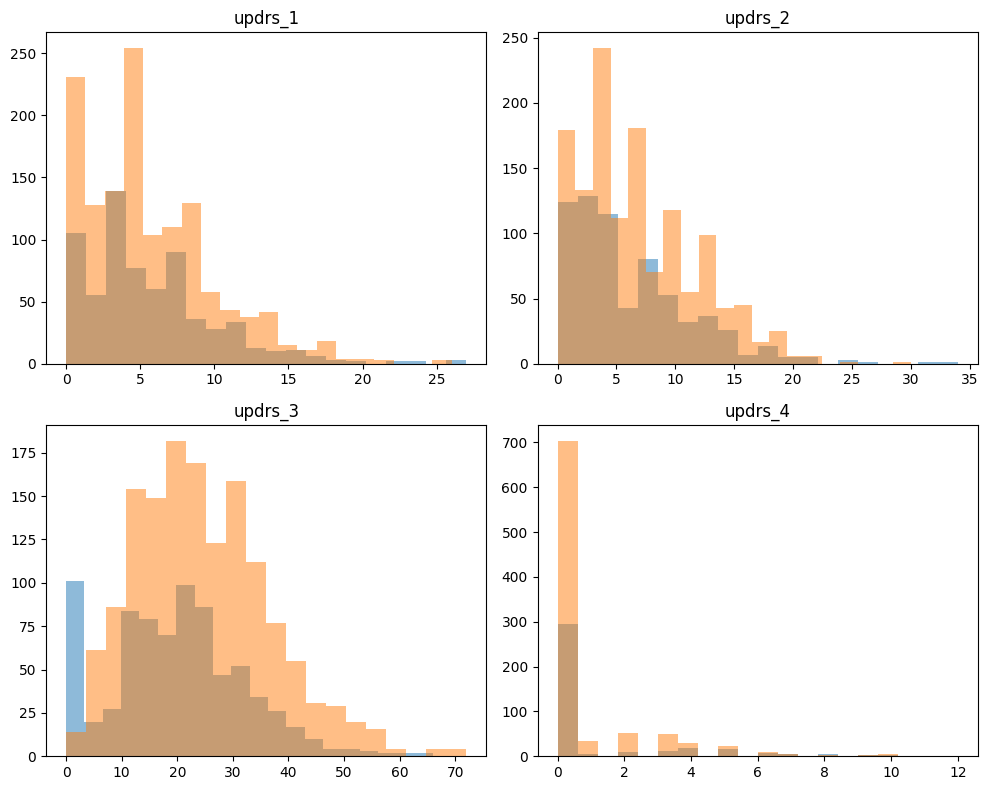

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for i, col in enumerate(columns):
    axs[i].hist(first_visit[col].dropna(), bins=20, alpha=0.5)
    axs[i].hist(rest_of_visit[col].dropna(), bins=20, alpha=0.5)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

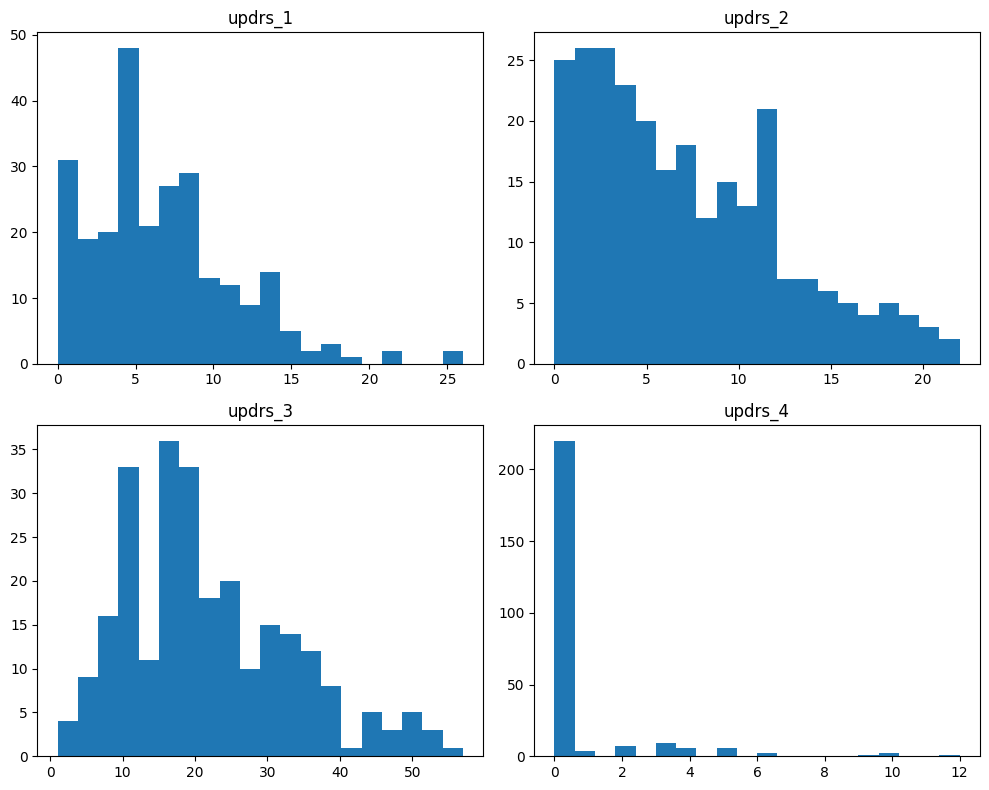

In [ ]:
mo_36 = sup_clin_df[sup_clin_df['visit_month']==36]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for i, col in enumerate(columns):
    axs[i].hist(mo_36[col].dropna(), bins=20)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
one_hot_encoded = pd.get_dummies(sup_clin_df['visit_month'], prefix='month')

# concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([sup_clin_df, one_hot_encoded], axis=1)

# drop the original visit_month column
df.drop('visit_month', axis=1, inplace=True)

/tmp/ipykernel_27714/214271610.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', n_months)


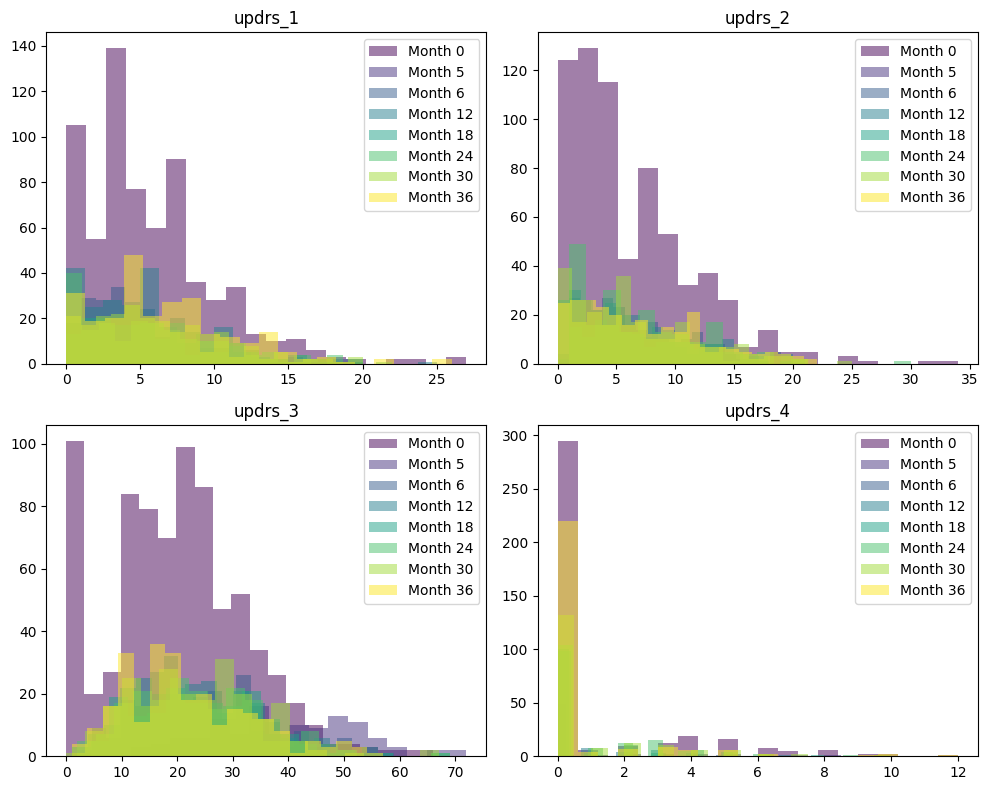

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Create a colormap to generate colors for each month
colors = cm.get_cmap('viridis', n_months)

for i, col in enumerate(columns):
    for j, (month, data) in enumerate(data_list.items()):
        # Plot the histogram with a different color for each month
        axs[i].hist(data[col].dropna(), bins=20, alpha=0.5, color=colors(j), label=f'Month {visits[j]}')
        axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_27714/3125576632.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', n_months)


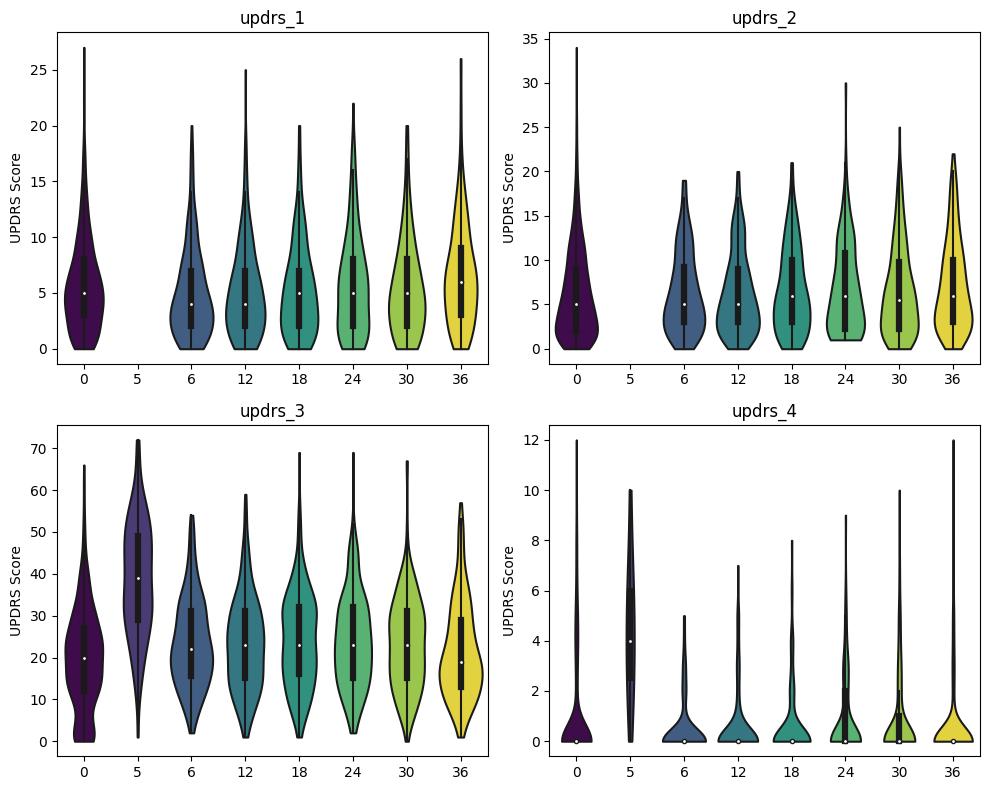

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Create a colormap to generate colors for each month
colors = cm.get_cmap('viridis', n_months)

for i, col in enumerate(columns):
    violin_data = []
    violin_labels = []
    for j, (month, data) in enumerate(data_list.items()):
        violin_data.append(data[col].dropna())
        violin_labels.append(f'{visits[j]}')
        
    # Plot the violin plot with a different color for each month
    sns.violinplot(data=violin_data, palette=colors.colors, ax=axs[i], cut=0)
    axs[i].set_title(col)
    axs[i].set_xticklabels(violin_labels)
    axs[i].set_ylabel('UPDRS Score')

plt.tight_layout()
plt.show()


/tmp/ipykernel_27714/50067994.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', n_months)
/tmp/ipykernel_27714/50067994.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Month', y=col, data=merged_data, palette=colors.colors, ax=axs[i], jitter=True, size=4, edgecolor='gray', linewidth=0.5)
/home/nolan/miniconda3/envs/kaggle-amp/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/tmp/ipykernel_27714/50067994.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Month', y=col, data=merged_data, palette=colors.colors, ax=axs[i], jitter=Tr

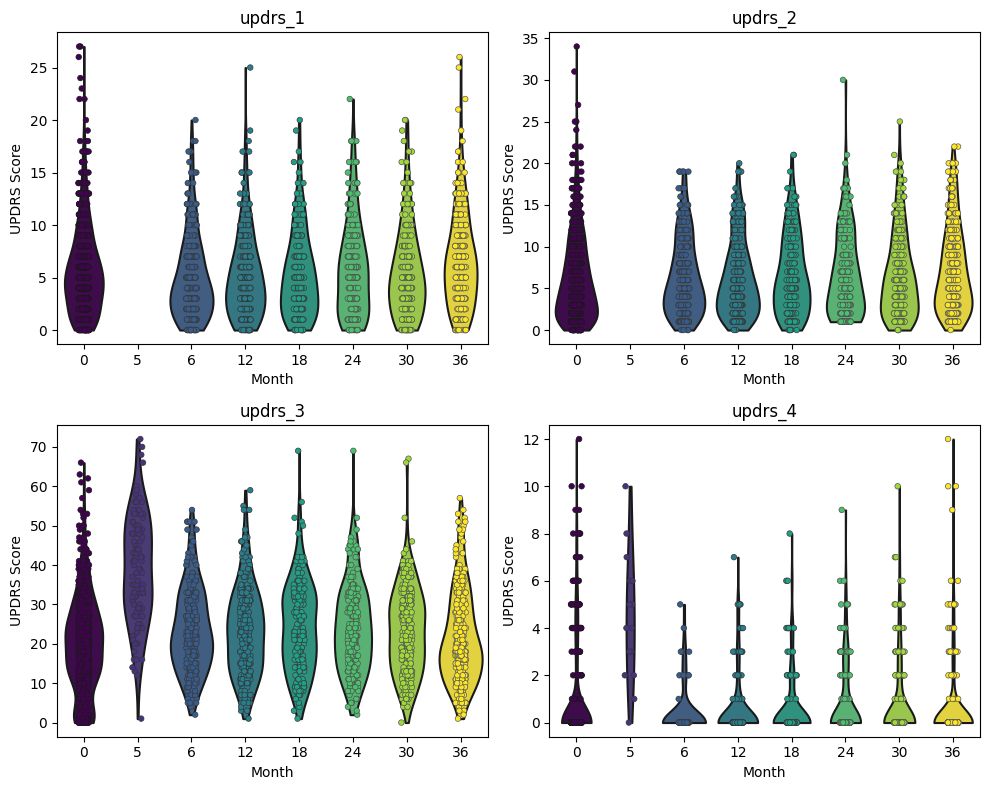

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Create a colormap to generate colors for each month
colors = cm.get_cmap('viridis', n_months)

for i, col in enumerate(columns):
    # Create a list of DataFrames for each month with an additional column for the month
    month_data = [data.assign(Month=f'{visits[j]}') for j, (month, data) in enumerate(data_list.items())]

    # Concatenate the DataFrames into a single DataFrame
    merged_data = pd.concat(month_data)

    # Plot the violin plot with a different color for each month
    sns.violinplot(x='Month', y=col, data=merged_data, palette=colors.colors, ax=axs[i], cut=0, inner=None)

    # Add stripplot to show individual data points
    sns.stripplot(x='Month', y=col, data=merged_data, palette=colors.colors, ax=axs[i], jitter=True, size=4, edgecolor='gray', linewidth=0.5)

    axs[i].set_title(col)
    axs[i].set_ylabel('UPDRS Score')

plt.tight_layout()
plt.show()


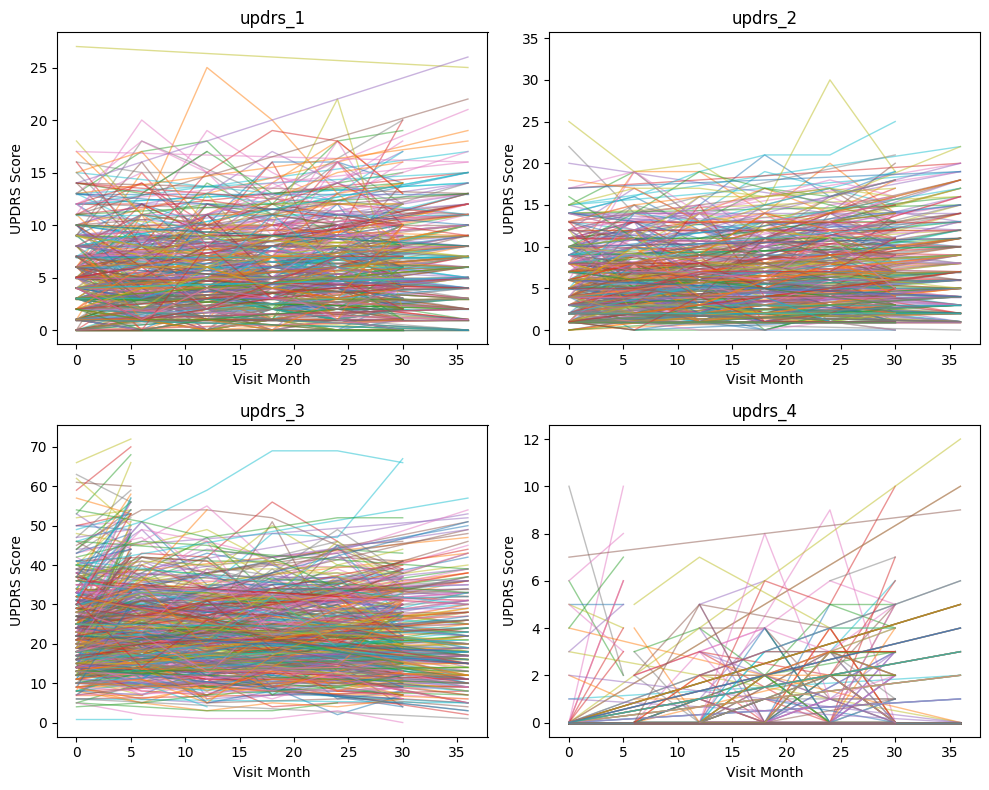

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Concatenate the DataFrames into a single DataFrame
merged_data = pd.concat(data_list.values())

unique_patient_ids = merged_data['patient_id'].unique()

for i, col in enumerate(columns):
    for patient_id in unique_patient_ids:
        patient_data = merged_data[merged_data['patient_id'] == patient_id]

        # Plot the line plot for each patient, connecting only existing points
        axs[i].plot(patient_data['visit_month'], patient_data[col], linewidth=1, alpha=0.5)

    axs[i].set_title(col)
    axs[i].set_xlabel('Visit Month')
    axs[i].set_ylabel('UPDRS Score')

plt.tight_layout()
plt.show()


/tmp/ipykernel_26530/2011266380.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', n_months)


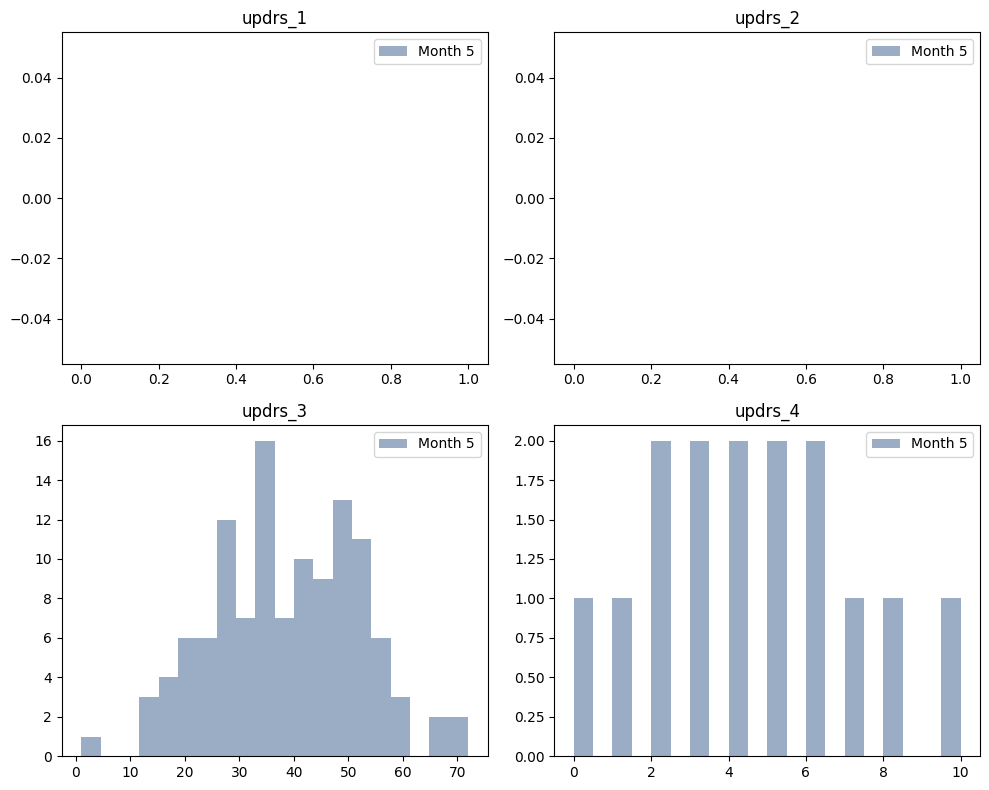

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Create a colormap to generate colors for each month
colors = cm.get_cmap('viridis', n_months)

for i, col in enumerate(columns):
    for j, (month, data) in enumerate(data_list.items()):
        # Plot the histogram with a different color for each month
        if visits[j] == 5:
            axs[i].hist(data[col].dropna(), bins=20, alpha=0.5, color=colors(j), label=f'Month {visits[j]}')
            axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_26530/1534031040.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', n_months)


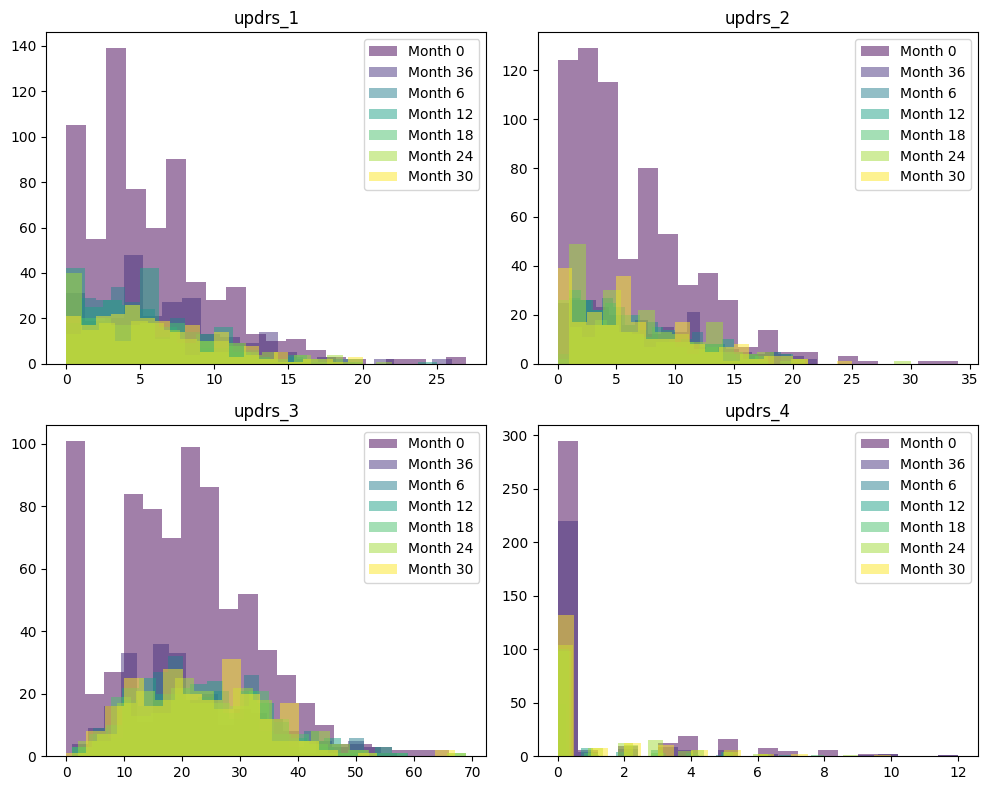

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Create a colormap to generate colors for each month
colors = cm.get_cmap('viridis', n_months)

for i, col in enumerate(columns):
    for j, (month, data) in enumerate(data_list.items()):
        # Plot the histogram with a different color for each month
        if visits[j] != 5:
            axs[i].hist(data[col].dropna(), bins=20, alpha=0.5, color=colors(j), label=f'Month {visits[j]}')
            axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()


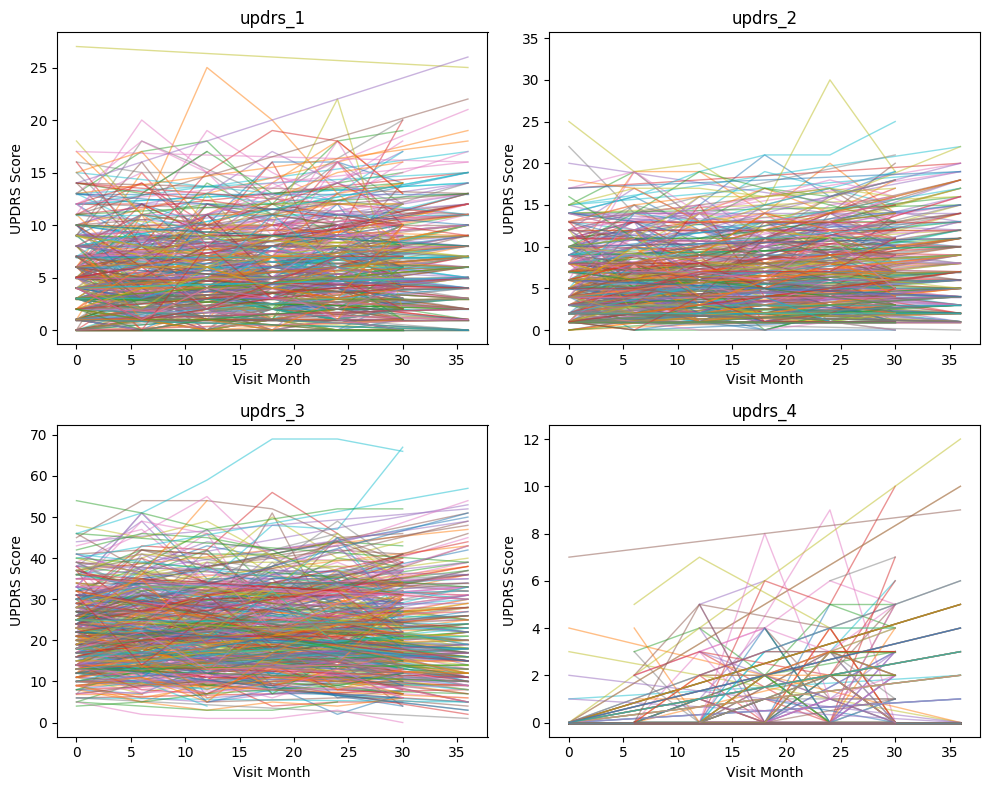

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
n_months = len(visits)

# Concatenate the DataFrames into a single DataFrame
merged_data = pd.concat(data_list.values())

unique_patient_ids = merged_data['patient_id'].unique()

for i, col in enumerate(columns):
    for patient_id in unique_patient_ids:
        patient_data = merged_data[merged_data['patient_id'] == patient_id]

        # Remove the rows where visit_month is 5
        patient_data = patient_data[patient_data['visit_month'] != 5]

        # Plot the line plot for each patient, connecting only existing points
        axs[i].plot(patient_data['visit_month'], patient_data[col], linewidth=1, alpha=0.5)

    axs[i].set_title(col)
    axs[i].set_xlabel('Visit Month')
    axs[i].set_ylabel('UPDRS Score')

plt.tight_layout()
plt.show()


In [21]:
data_list.values()

dict_values([     visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4   
0        35_0          35            0      5.0      3.0     16.0      0.0  \
2        75_0          75            0      4.0      6.0     26.0      0.0   
4       155_0         155            0      NaN      NaN      0.0      NaN   
5       337_0         337            0      5.0      7.0      6.0      0.0   
7       527_0         527            0      6.0      2.0      9.0      0.0   
...       ...         ...          ...      ...      ...      ...      ...   
2211  65290_0       65290            0      4.0     14.0     18.0      NaN   
2216  65303_0       65303            0      0.0      2.0     20.0      0.0   
2218  65382_0       65382            0      NaN      NaN      0.0      NaN   
2219  65405_0       65405            0      5.0     16.0     31.0      0.0   
2221  65530_0       65530            0     10.0      6.0     24.0      0.0   

     upd23b_clinical_state_on_medication  
0      

In [22]:
for df in data_list.values():
    print(df)

     visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4   
0        35_0          35            0      5.0      3.0     16.0      0.0  \
2        75_0          75            0      4.0      6.0     26.0      0.0   
4       155_0         155            0      NaN      NaN      0.0      NaN   
5       337_0         337            0      5.0      7.0      6.0      0.0   
7       527_0         527            0      6.0      2.0      9.0      0.0   
...       ...         ...          ...      ...      ...      ...      ...   
2211  65290_0       65290            0      4.0     14.0     18.0      NaN   
2216  65303_0       65303            0      0.0      2.0     20.0      0.0   
2218  65382_0       65382            0      NaN      NaN      0.0      NaN   
2219  65405_0       65405            0      5.0     16.0     31.0      0.0   
2221  65530_0       65530            0     10.0      6.0     24.0      0.0   

     upd23b_clinical_state_on_medication  
0                   